In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
fileList =[]
import glob, os
for file in glob.glob("*.txt"):
    fileList.append(file)

In [50]:
nm=1e-9
noAQs = []
noAQ = {}
AQs = []
AQ = {}
AQ2 = {} 
AQ3 = {}
noAQvals = []
noAQvals2 = []
for item in fileList:
    if item[0] == 'n':
        noAQs.append(item)
        f = open(item,'r')
        search=f.readlines()
        f.close()
        val = search[0][5:]
        val2 = search[1][5:]
        noAQ['{}'.format(item[5])] = float(val)/nm
        noAQvals.append(float(val)/nm)
        noAQvals2.append(float(val2)/nm)
    else:
        AQs.append(item)
        AQ['{}'.format(item[3])] ={}
        AQ2['{}'.format(item[3])] ={}
        AQ3['{}'.format(item[3])] ={}
        

for item in AQs:
    L,R = item.split(".")
    num1 = L[3]
    f = open(item,"r")
    search = f.readlines()
    f.close()
    val = search[0][5:]
    val2 = search[1][5:]
    val3 = search[2][8:]
    AQ['{}'.format(str(num1))]=float(val)/nm
    AQ2['{}'.format(str(num1))]=float(val2)/nm
    AQ3['{}'.format(str(num1))]=float(val3)
    
AQkeys = AQ.keys()



In [8]:
### So I want to compare noAQ to AQ with the same # of pores across all charges
print AQ
print AQ.keys()

{'3': 0.197577274566, '5': 0.16442327129, '4': 0.176472813534, '7': 0.11775453322599999, '6': 0.14551233950399997, '8': 0.0962521002565}
['3', '5', '4', '7', '6', '8']


In [9]:
xs = []
ys=[]
y2=[]
ys2 = []
y3=[]
count =1
for key in sorted(AQ.iterkeys()):

    xs.append(int(key))
    ys.append((AQ['{}'.format(key)]))
    y2.append((AQ2['{}'.format(key)]))
    y3.append((AQ3['{}'.format(key)]))


3
4
5
6
7
8


In [11]:
noAQvals = np.stack((noAQvals,noAQvals,noAQvals,noAQvals,noAQvals,noAQvals))
noAQvals2 = np.stack((noAQvals2,noAQvals2,noAQvals2,noAQvals2,noAQvals2,noAQvals2))

In [34]:
### From notebook "Priyesh_update"

D_experimental = np.mean([5.84054089e-07, 4.55903537e-07, 3.03720426e-07, 3.17304903e-07])*1e5
D_exp =[]
for i in range(6):
    D_exp.append(D_experimental)

<Figure size 3000x2000 with 0 Axes>

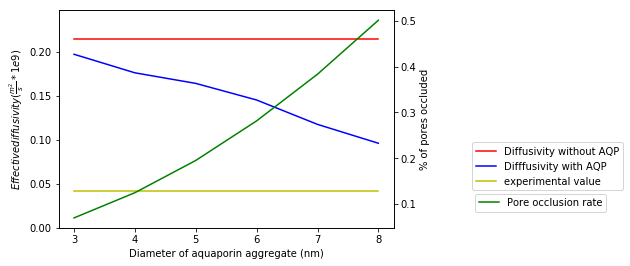

In [47]:
plt.figure(dpi=500)
fig, ax1 = plt.subplots()

ax1.plot(xs,noAQvals,'r',label="Diffusivity without AQP")
ax1.plot(xs,ys[:],'b',label="Difffusivity with AQP")
ax1.plot(xs,D_exp, 'y', label='experimental value')

plt.ylim(0,np.max(ys)+.05)
ax1.set_ylabel(r"$Effective diffusivity ( \frac{m^2}{s} * 1e9)$")
ax1.set_xlabel("Diameter of aquaporin aggregate (nm)")

ax2 = ax1.twinx()
ax2.plot(xs,y3[:],'g',label="Pore occlusion rate")
ax2.set_ylabel("% of pores occluded")
ax1.legend(bbox_to_anchor=(0., 0.15, 1.7, 0),loc=4)
ax2.legend(bbox_to_anchor=(0., 0.05, 1.65, 0),loc=4)




In [ ]:
plt.figure(dpi=300)


plt.plot(xs,y2[:],label="0mV")

plt.plot(xs,noAQvals2,label="noAQ")

plt.legend()
plt.ylim(0,np.max(y2)+.01)
plt.xlabel("Diameter of AQP")
plt.ylabel(r"$Deff ( \frac{m^2}{s} * 1e9)$")

noAQ = []
AQ = {}
AQ['4']={}
AQ['5']={}
AQ['6']={}
for item in fileList:
    if item[0] == 'n':
        noAQ.append(item)
    else:
        if item[3] == '4':
            if '-10' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val)
            elif '-5' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_0' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_5' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_10' in item:
                AQ['4']['10']=item                   
        elif item[3] =='5':
            if '-10' in item:
                AQ['5']['-10']=item
            elif '-5' in item:
                AQ['5']['-5']=item
            elif '_0' in item:
                AQ['5']['0']=item
            elif '_5' in item:
                AQ['5']['5']=item
            elif '_10' in item:
                AQ['5']['10']=item
        else:
            if '-10' in item:
                AQ['6']['-10']=item
            elif '-5' in item:
                AQ['6']['-5']=item
            elif '_0' in item:
                AQ['6']['0']=item
            elif '_5' in item:
                AQ['6']['5']=item
            elif '_10' in item:
                AQ['6']['10']=item